 # Applied Data Science Capstone by IBM/Coursera
 ## Capstone Project - The Battle of the Neighborhoods
 
 ## Table of contents
* [Introduction: Problem Description](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)

## Introduction: Problem Description <a name="introduction"></a>
Today we all are fighting against a virus. And our victory is the most important thing than any business idea. That's why is important to analyze data that we have and to see where the situation is really difficult where it just starts to be difficult. How quarantine impacts on number of disease cases etc.

![Corona virus](https://thumb.tildacdn.com/tild3433-3466-4162-a636-313033393538/-/resize/440x/-/format/webp/coronavirus-02---.jpg)

The virus, which causes a pneumonia-like disease called **COVID-19** and has so far killed more than **160000** people worldwide, quickly burst through national borders. The coronavirus **COVID-19** is affecting **210** countries and territories around the world. On this day (20th April 2020) **2,431,390** cases of the disease were detected. There are **1627721** currently infected patients and 3% of them are in serious or critical condition. There are also **803 669** cases that had an outcome and 21% from them are deaths.
This pandemic is a global problem. And no other idea is important like stop spreading **COVID-19**. That's why I decided to analyze data connected with **COVID-19**.

With the rapid spread in the novel corona-virus across countries, the **World Health Organisation (WHO)** and several organizations have published the latest results on the impact of **COVID-19** over the past few months.

![](https://followers.com.ua/coronavirus/covid19-act-now/covid19-map-1.min.png)

**Who can be interested?**

Everyone. Because it is a global problem. It could be a mother, a student, a politician, a doctor. Everyone, who wants to know the current situation. Everyone who wants to continue the analysis. Everyone, who wants to start doing something to make the situation better.
![](https://www.freevector.com/uploads/vector/preview/28523/Group-of-People.jpg)

## Data <a name="data"></a>
Based on definition of problem, We need data for every country about:
* the number of confirmed cases
* the number of deaths
* the number of recovery cases. 
Also for better analyze we need: demographic data:
* number of inhabitants for each country

In my analysis, I will use a dataset from Johns Hopkins (JHU). 
![](https://medinaschool.org/files/images/2017/07/320401b40073cd8d018fdd901cf88622.jpg)

**The main reasons cited for using the JHU data are:**
- JHU is already a trusted and respected institution,
- They cite many sources, which are themselves reputable,
- The data is updated daily, and
- It is provided in an easily digestible format (.csv in a github repository).
This dataset has daily level information on the number of affected cases, deaths and recovery from 2019 novel coronavirus. The number of cases on any given day is the cumulative number.

Demographic data will be attached.

### Import libraries

In [43]:
# ! pip install plotly --upgrade

Requirement already up-to-date: plotly in /opt/conda/envs/Python36/lib/python3.6/site-packages (4.6.0)


In [35]:
# import requests
# from bs4 import BeautifulSoup
# from pandas.io.json import json_normalize
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot, init_notebook_mode
import plotly.express as px
import plotly.graph_objs as go

# !conda install -c conda-forge geocoder --yes
# import geocoder
import pandas as pd

# !conda install -c conda-forge folium=0.10.1 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# !conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
# from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

# Set style & figures inline
sns.set()
%matplotlib inline

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.10.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    branca-0.4.0               |             py_0          26 KB  conda-forge
    folium-0.10.1              |             py_0          59 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    certifi-2020.4.5.1         |   py36h9f0ad1d_0         151 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.1 |       hecc5488_0         146 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be

Let's look at the data from JHU. For this, I read .csv file using URL on [github page](https://github.com/CSSEGISandData/COVID-19) where everyone can find updated datasets and more information.

In [3]:
# Data urls
base_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/'
confirmed_cases_data_url = base_url + 'time_series_covid19_confirmed_global.csv'
death_cases_data_url = base_url + 'time_series_covid19_deaths_global.csv'
recovery_cases_data_url = base_url+ 'time_series_covid19_recovered_global.csv'

# Import datasets as pandas dataframes
raw_data_confirmed = pd.read_csv(confirmed_cases_data_url)
raw_data_deaths = pd.read_csv(death_cases_data_url)
raw_data_recovered = pd.read_csv(recovery_cases_data_url)

In [4]:
raw_data_confirmed.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/17/20  4/18/20  4/19/20  4/20/20  \
0        0        0        0  ...      906      933      996     1026   
1        0        0        0  ...      539      548      562      584   
2        0        0        0  ...     2418     2534     2629     2718   
3        0        0        0  ...      696      704      713      717   
4        0        0        0  ...       19       24       24       24   

   4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  
0     1092     1176     1279     1351     1463     1531  
1      609      634      663      678      712      726  
2     2811     2910     3007     3127     3256     3382  
3      717      723      723      731      738      738  
4       24       25       25       25       25       26  

[5 rows x 100 columns]

In [5]:
raw_data_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 100 columns):
Province/State    82 non-null object
Country/Region    264 non-null object
Lat               264 non-null float64
Long              264 non-null float64
1/22/20           264 non-null int64
1/23/20           264 non-null int64
1/24/20           264 non-null int64
1/25/20           264 non-null int64
1/26/20           264 non-null int64
1/27/20           264 non-null int64
1/28/20           264 non-null int64
1/29/20           264 non-null int64
1/30/20           264 non-null int64
1/31/20           264 non-null int64
2/1/20            264 non-null int64
2/2/20            264 non-null int64
2/3/20            264 non-null int64
2/4/20            264 non-null int64
2/5/20            264 non-null int64
2/6/20            264 non-null int64
2/7/20            264 non-null int64
2/8/20            264 non-null int64
2/9/20            264 non-null int64
2/10/20           264 non-null int64
2

In [6]:
raw_data_confirmed.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  264.000000  264.000000  264.000000  264.000000  264.000000  264.000000   
mean    21.317326   22.168315    2.102273    2.477273    3.564394    5.431818   
std     24.734994   70.669996   27.382118   27.480921   34.210982   47.612615   
min    -51.796300 -135.000000    0.000000    0.000000    0.000000    0.000000   
25%      6.969250  -20.026050    0.000000    0.000000    0.000000    0.000000   
50%     23.488100   20.535638    0.000000    0.000000    0.000000    0.000000   
75%     41.166075   78.750000    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...        4/17/20  \
count   264.000000   264.000000   264.000000   264.000000  ...     264.000000   
mean      8.022727    11.087121    21.128788    23.356061  ...    8481.606061   
std      66.537101    89.647535   220.011922   221.352587  ...   48378.478927   
min       0.000000     0.000000     0.000000     0.000000  ...      -1.000000   
25%       0.000000     0.000000     0.000000     0.000000  ...      51.250000   
50%       0.000000     0.000000     0.000000     0.000000  ...     335.000000   
75%       0.000000     0.000000     0.000000     0.000000  ...    1575.500000   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  699706.000000   

             4/18/20        4/19/20        4/20/20        4/21/20  \
count     264.000000     264.000000     264.000000     264.000000   
mean     8775.439394    9091.204545    9360.784091    9651.859848   
std     50318.473131   52077.924575   53660.537673   55395.224332   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%        55.000000      55.000000      59.250000      64.000000   
50%       339.000000     341.500000     343.500000     352.500000   
75%      1615.750000    1654.250000    1678.500000    1737.500000   
max    732197.000000  758809.000000  784326.000000  811865.000000   

             4/22/20        4/23/20        4/24/20        4/25/20  \
count     264.000000     264.000000     264.000000     264.000000   
mean     9935.791667   10256.545455   10642.041667   10972.515152   
std     57150.741497   58974.541833   61245.933586   63283.830102   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%        64.500000      71.500000      72.750000      72.750000   
50%       357.000000     380.500000     403.000000     403.000000   
75%      1787.500000    1797.750000    1816.250000    1915.750000   
max    840351.000000  869170.000000  905358.000000  938154.000000   

             4/26/20  
count     264.000000  
mean    11255.587121  
std     65001.265871  
min        -1.000000  
25%        74.000000  
50%       423.000000  
75%      1960.500000  
max    965785.000000  

[8 rows x 98 columns]

So, how you can see, the dataset contains a Province/State column for some countries (just 82 non-null objects), Country/Region column (264 non-null objects), Latitude and	Longitude, and dates.

How I've mentioned earlier, this data is time-series data. So, the next step is datasets modification for better working with them. I am going to make from columns dates data index.

## Methodology <a name="methodology"></a>

In this project, we will direct our efforts on analyzing of the spread of COVID-19 in the world.

In first step, we look at JHU data and analyze the number of confirmed cases, deaths, and recovery cases per country.

The second step in our analysis will be to calculation these cases on population per country.

In third step, we will cluster countries.

In the last step, we will make a quick analysis of the US.

## Analysis <a name="analysis"></a>

In [7]:
# Function for grouping countries by region
def group_by_country(raw_data):
    """Returns data for countries indexed by date"""
    # Group by
    data = raw_data.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
    # Transpose
    data = data.transpose()
    # Set index as DateTimeIndex
    datetime_index = pd.DatetimeIndex(data.index)
    data.set_index(datetime_index, inplace=True)
    return data

In [8]:
# Function to align growth curves
def align_curves(data, min_val):
    """Align growth curves  to start on the day when the number of known deaths = min_val"""
    # Loop over columns & set values < min_val to None
    for col in data.columns:
        data.loc[(data[col] < min_val),col] = None
    # Drop columns with all NaNs
    data.dropna(axis=1, how='all', inplace=True)
    # Reset index, drop date
    data = data.reset_index().drop(['index'], axis=1)
    # Shift each column to begin with first valid index
    for col in data.columns:
        data[col] = data[col].shift(-data[col].first_valid_index())
    return data

In [9]:
# Function to plot time series
def plot_time_series(df, plot_title, x_label, y_label, logy=False):
    """Plot time series and make looks a bit nice"""
    ax = df.plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, logy=logy)
    ax.legend(ncol=3, loc='lower right')
    plt.xlabel(x_label, fontsize=20);
    plt.ylabel(y_label, fontsize=20);
    plt.title(plot_title, fontsize=20);

# Confirmed cases of COVID-19

In [10]:
raw_data_confirmed.tail()

Province/State         Country/Region        Lat       Long  \
259  Saint Pierre and Miquelon                 France  46.885200 -56.315900   
260                        NaN            South Sudan   6.877000  31.307000   
261                        NaN         Western Sahara  24.215500 -12.885800   
262                        NaN  Sao Tome and Principe   0.186360   6.613081   
263                        NaN                  Yemen  15.552727  48.516388   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  4/17/20  \
259        0        0        0        0        0        0  ...        1   
260        0        0        0        0        0        0  ...        4   
261        0        0        0        0        0        0  ...        6   
262        0        0        0        0        0        0  ...        4   
263        0        0        0        0        0        0  ...        1   

     4/18/20  4/19/20  4/20/20  4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  \
259        1        1        1        1        1        1        1        1   
260        4        4        4        4        4        5        5        5   
261        6        6        6        6        6        6        6        6   
262        4        4        4        4        4        4        4        4   
263        1        1        1        1        1        1        1        1   

     4/26/20  
259        1  
260        6  
261        6  
262        4  
263        1  

[5 rows x 100 columns]

In [11]:
confirmed_country = raw_data_confirmed.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
confirmed_country = confirmed_country.transpose()
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(confirmed_country.index)
confirmed_country.set_index(datetime_index, inplace=True)

I chose a few countries to look at numbers of confirmed cases by country (Note that data is time series and number of cases on any given day is the cumulative number.)

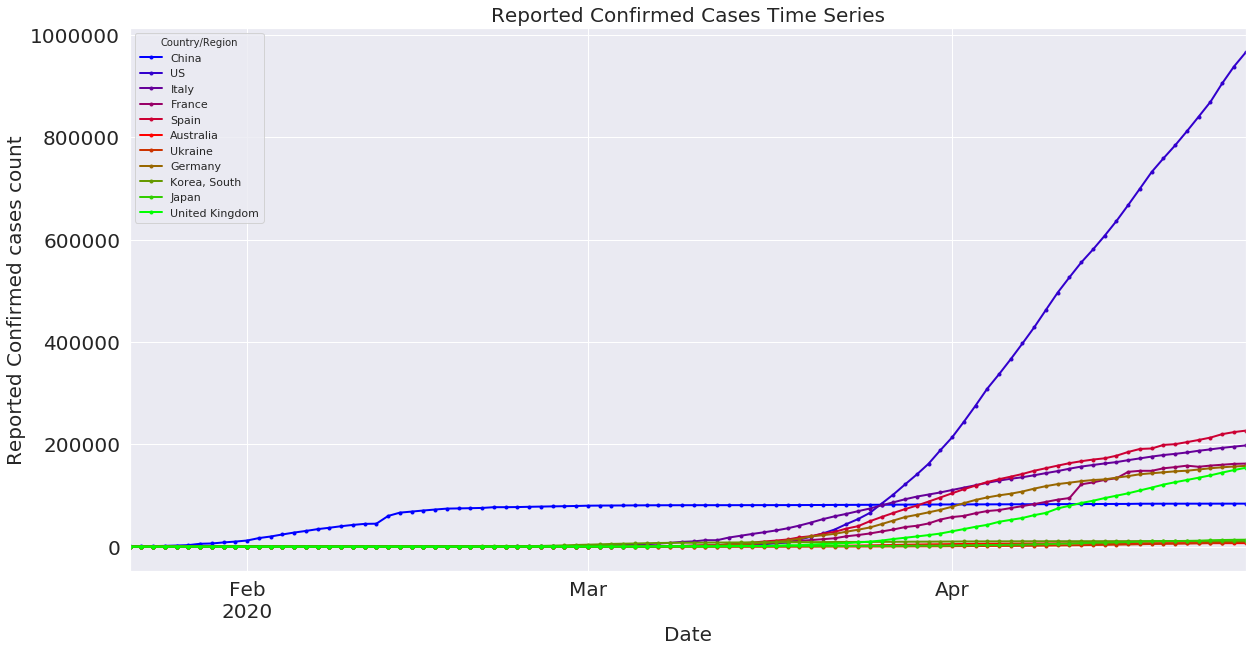

In [12]:
# Plot time series of several countries of interest
poi = ['China', 'US', 'Italy', 'France', 'Spain', 'Australia', 'Ukraine', 'Germany', 'Korea, South', 'Japan', 'United Kingdom']
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed cases count', fontsize=20);
plt.title('Reported Confirmed Cases Time Series', fontsize=20);

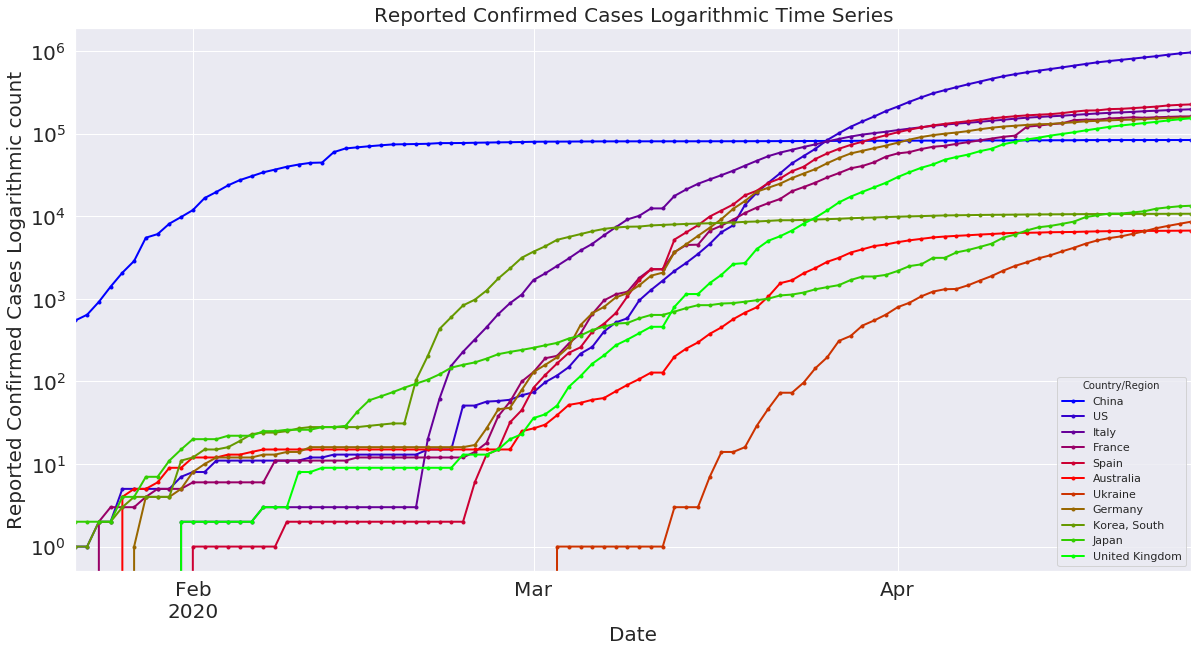

In [13]:
confirmed_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20, logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Reported Confirmed Cases Logarithmic count', fontsize=20);
plt.title('Reported Confirmed Cases Logarithmic Time Series', fontsize=20);

We can see how growth the number of cases for each chosen country. In a log scale, it is easier to recognize which stage we are and how far for a plateau. Also it is easier to show the date of the first case. But we need to remember that we live in a linear scale.

To sum up, the first case in Ukraine officially was confirmed in March. China is on a plateau, the number of cases in Europe still rapid growth but it seems they are near a plateau unlike in the USA. South Korean and Australia are on the stage of a plateau too.

# Deaths cases of COVID-19

In [14]:
raw_data_deaths.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/17/20  4/18/20  4/19/20  4/20/20  \
0        0        0        0  ...       30       30       33       36   
1        0        0        0  ...       26       26       26       26   
2        0        0        0  ...      364      367      375      384   
3        0        0        0  ...       35       35       36       37   
4        0        0        0  ...        2        2        2        2   

   4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  
0       36       40       42       43       47       50  
1       26       27       27       27       27       28  
2      392      402      407      415      419      425  
3       37       37       37       40       40       40  
4        2        2        2        2        2        2  

[5 rows x 100 columns]

In [15]:
deaths_country = raw_data_deaths.groupby(['Country/Region']).sum().drop(['Lat', 'Long'], axis=1)
deaths_country = deaths_country.transpose()
# Set index as DateTimeIndex
datetime_index = pd.DatetimeIndex(deaths_country.index)
deaths_country.set_index(datetime_index, inplace=True)

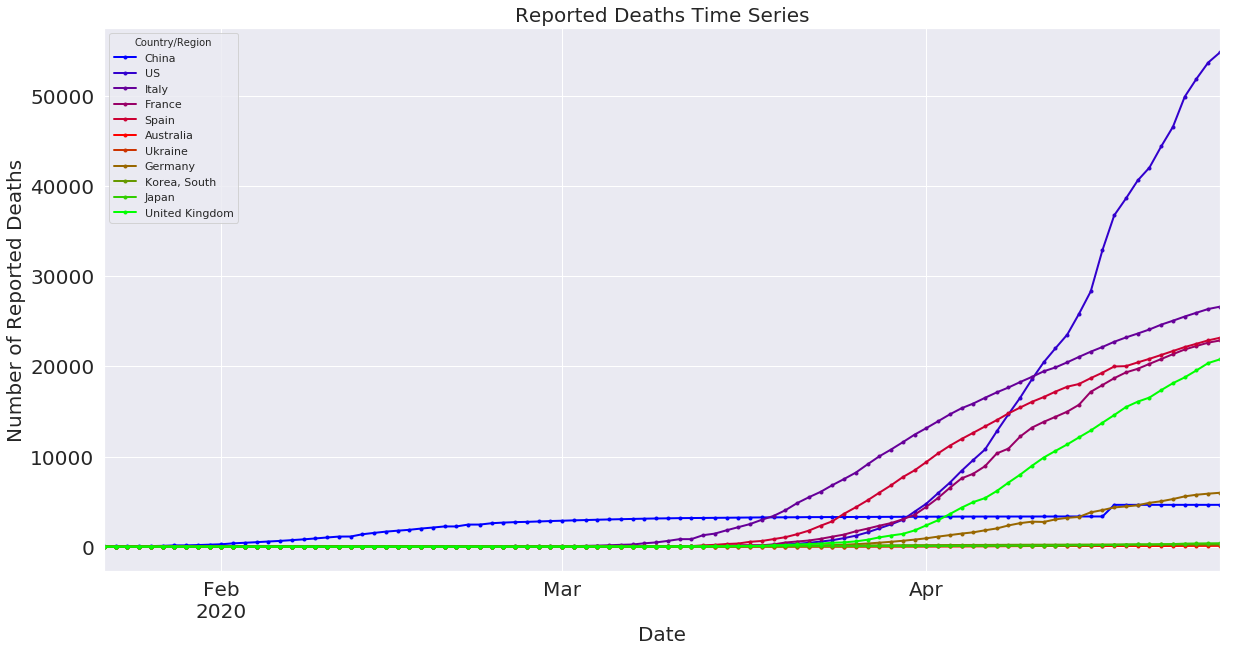

In [16]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', colormap='brg', fontsize=20)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

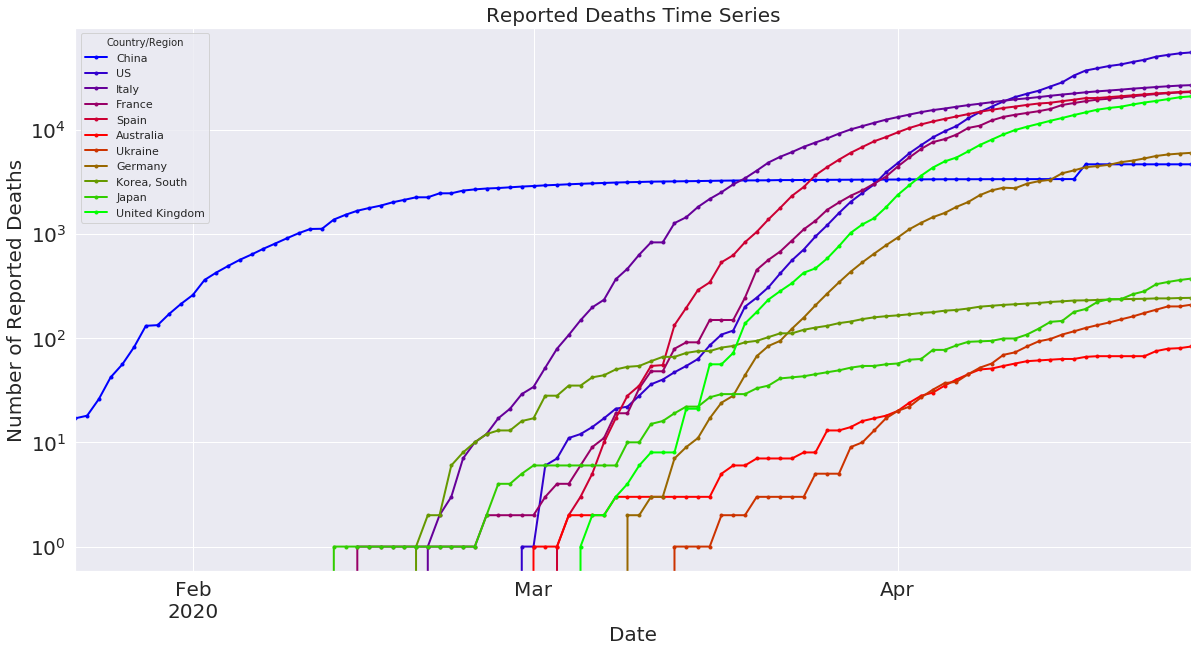

In [17]:
# Plot time series of several countries of interest
deaths_country[poi].plot(figsize=(20,10), linewidth=2, marker='.', fontsize=20, colormap='brg', logy=True)
plt.xlabel('Date', fontsize=20);
plt.ylabel('Number of Reported Deaths', fontsize=20);
plt.title('Reported Deaths Time Series', fontsize=20);

In [18]:
deaths_country_drop = group_by_country(raw_data_deaths)
deaths_country_drop = align_curves(deaths_country_drop, min_val=50) #choose countries where known deaths ≥ 50

Let's look at the plot not by date but by total number of days in the country.

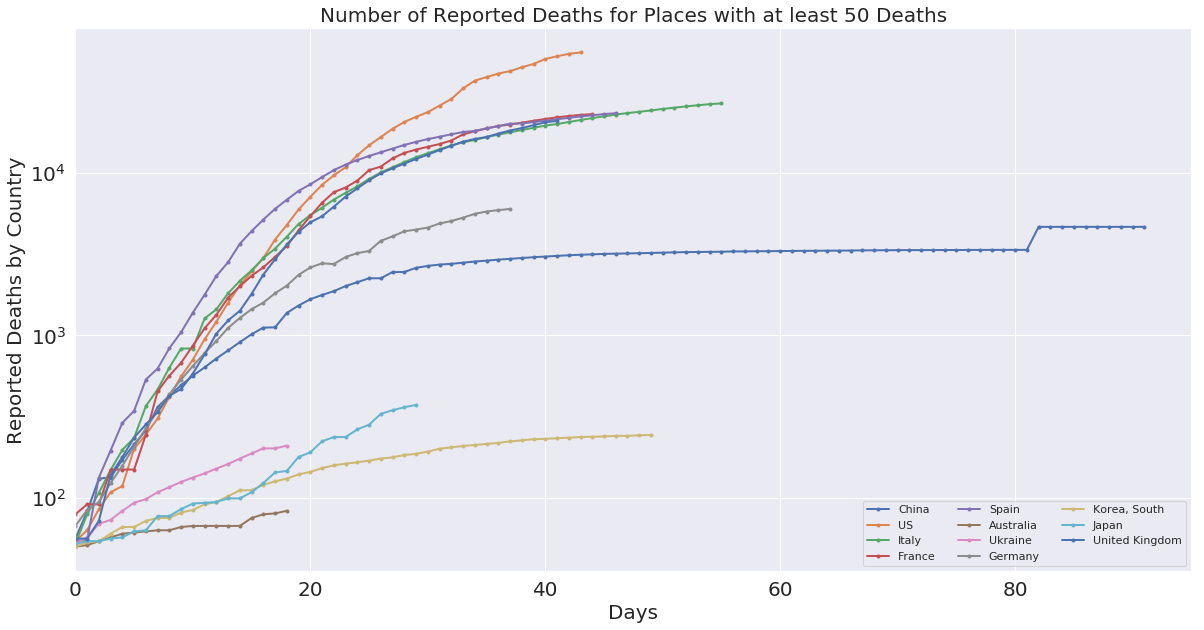

In [115]:
plot_time_series(deaths_country_drop[poi], 'Number of Reported Deaths for Places with at least 50 Deaths', 'Days', 'Reported Deaths by Country', logy=True)

In [19]:
plot_time_series(deaths_country_drop, 'Number of Reported Deaths for Places with at least 50 Deaths', 'Days', 'Reported Deaths by Country', logy=True)

On 20 days the biggest number of deaths was in Spain, but on 40 day - in the US. The smallest number of deaths on 20 and 40 day was in South Korea.

# Recovered cases of COVID-19

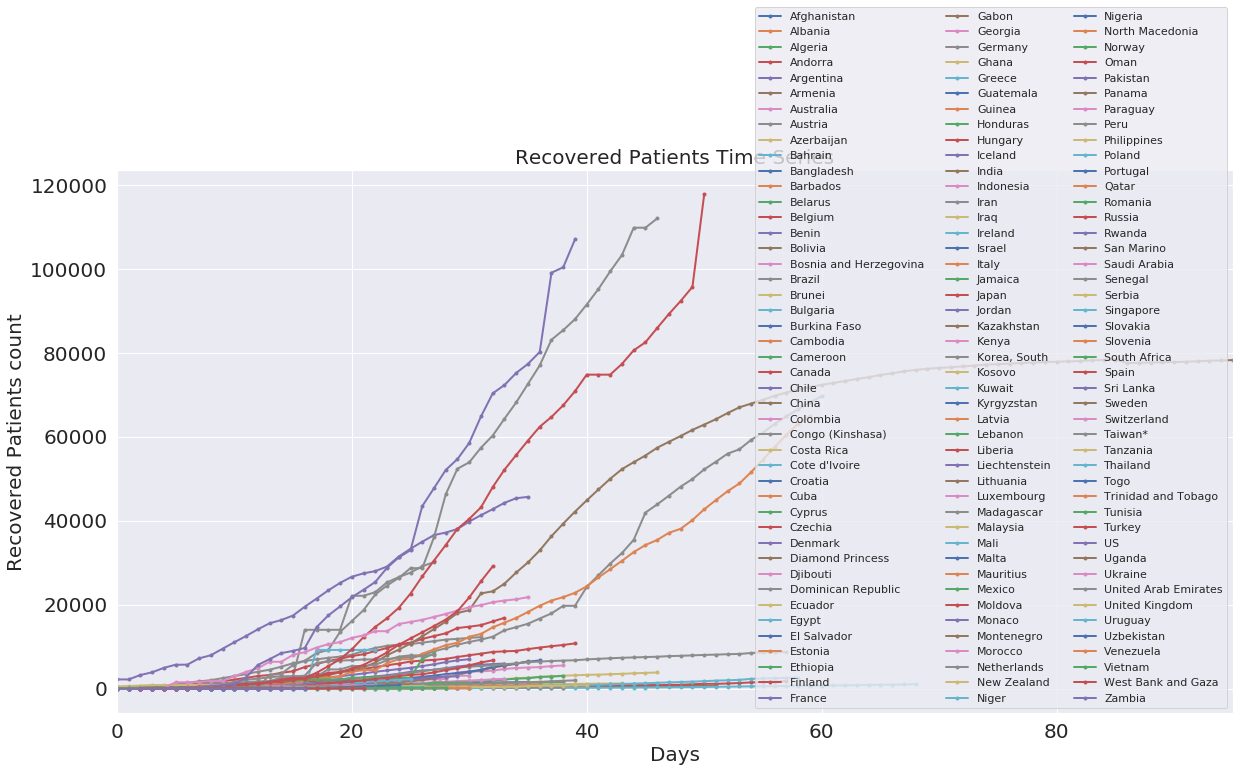

In [20]:
recovered_country = group_by_country(raw_data_recovered)
recovered_country_drop = align_curves(recovered_country, min_val=25)
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count')

In [21]:
plot_time_series(recovered_country_drop, 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

In [22]:
plot_time_series(recovered_country_drop[poi], 'Recovered Patients Time Series', 'Days', 'Recovered Patients count', True)

Of course, the more people live in a country the more cases will be detected. So, I use data from kaggle where all cases combined per each date and data about a population by countries and rescale a number of cases.

#### Add csv files

In [93]:
# The code was removed by Watson Studio for sharing.

ObservationDate Province/State         Country  Confirmed  Deaths  Recovered
0      01/22/2020          Anhui  Mainland China        1.0     0.0        0.0
1      01/22/2020        Beijing  Mainland China       14.0     0.0        0.0
2      01/22/2020      Chongqing  Mainland China        6.0     0.0        0.0
3      01/22/2020         Fujian  Mainland China        1.0     0.0        0.0
4      01/22/2020          Gansu  Mainland China        0.0     0.0        0.0

In [94]:
body = client_8ebb3dab3d52442098e6ab3eec385363.get_object(Bucket='ibmcapstone-donotdelete-pr-69qaeapaalibwt',Key='countries_by_population_2019.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

countries = pd.read_csv(body)
countries.head()


Rank           name      pop2019  pop2018  GrowthRate       area   Density
0     1          China  1433783.686      NaN      1.0039  9706961.0  147.7068
1     2          India  1366417.754      NaN      1.0099  3287590.0  415.6290
2     3  United States   329064.917      NaN      1.0059  9372610.0   35.1092
3     4      Indonesia   270625.568      NaN      1.0107  1904569.0  142.0928
4     5       Pakistan   216565.318      NaN      1.0200   881912.0  245.5634

In [95]:

body = client_8ebb3dab3d52442098e6ab3eec385363.get_object(Bucket='ibmcapstone-donotdelete-pr-69qaeapaalibwt',Key='country_codes_2020.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

countries_iso = pd.read_csv(body)
countries_iso.head()


name cca2 cca3  ccn3
0     Afghanistan   AF  AFG     4
1         Albania   AL  ALB     8
2         Algeria   DZ  DZA    12
3  American Samoa   AS  ASM    16
4         Andorra   AD  AND    20

In [96]:
#fill missing Province/State with Country
df.loc[df['Province/State'].isnull(), 'Province/State'] = df.loc[df['Province/State'].isnull(), 'Country']

#keep most recent line per Province/State and Country
df.sort_values(['Country', 'Province/State', 'ObservationDate'], ascending = [True,True,False], inplace = True)
df = df.drop_duplicates(['Country', 'Province/State'], keep = "first")

#keep a copy for later on
df_state = df.copy()

df = df.drop(columns = "ObservationDate")

#groupby Country
df_country = df.groupby(['Country'], as_index=False)['Confirmed', 'Deaths'].sum()

#drop some columns
cols_to_drop = ['Rank', 'pop2018','GrowthRate', 'area', 'Density']
countries = countries.drop(columns = cols_to_drop)

#add ISO Alpha 3 code that I uploaded in another CSV
countries = countries.merge(countries_iso[['name', 'cca3']], on = ['name'], how = "left")

cols_to_rename = {'name': 'Country', 'pop2019': 'Population', 'cca3': 'ISO'}
countries = countries.rename(columns = cols_to_rename)

#just fixing the most important mismatches
countries_to_rename = {'US': 'United States',\
                       'Mainland China': 'China',\
                       'UK': 'United Kingdom',\
                       'Congo (Kinshasa)': 'DR Congo',\
                       'North Macedonia': 'Macedonia',\
                       'Republic of Ireland': 'Ireland',\
                       'Congo (Brazzaville)': 'Republic of the Congo'}

df_country['Country'] = df_country['Country'].replace(countries_to_rename)

df_country = df_country.merge(countries, on = "Country", how = "left")

#check mismatches
#df_country[df_country.ISO.isnull()].sort_values(['Confirmed'], ascending = False)

#dropping not matching countries, only small islands left
df_country = df_country.dropna()

#rounding population to millions with 2 digits, and creating two new columns
df_country['Population'] = round((df_country['Population']/1000),2)
df_country = df_country.rename(columns = {'Population': 'Population (million)'})
df_country['Cases per Million'] = round((df_country['Confirmed']/df_country['Population (million)']),2)
df_country['Deaths per Million'] = round((df_country['Deaths']/df_country['Population (million)']),2)

#filter out countries with less than a million population as for instance San Marino has extremely high figures on a very small population
df_country = df_country[(df_country['Population (million)'] > 1)]

df_country.head(10)

Country  Confirmed  Deaths  Recovered  Population (million)  ISO  \
2   Afghanistan      996.0    33.0      131.0                 38.04  AFG   
3       Albania      562.0    26.0      314.0                  2.88  ALB   
4       Algeria     2629.0   375.0     1047.0                 43.05  DZA   
6        Angola       24.0     2.0        6.0                 31.83  AGO   
8     Argentina     2839.0   132.0      709.0                 44.78  ARG   
9       Armenia     1291.0    20.0      545.0                  2.96  ARM   
11    Australia     6551.0    67.0     4124.0                 25.20  AUS   
12      Austria    14751.0   452.0    10501.0                  8.96  AUT   
13   Azerbaijan     1398.0    19.0      712.0                 10.05  AZE   
16      Bahrain     1881.0     7.0      759.0                  1.64  BHR   

    Cases per Million  Deaths per Million  
2               26.18                0.87  
3              195.14                9.03  
4               61.07                8.71  
6                0.75                0.06  
8               63.40                2.95  
9              436.15                6.76  
11             259.96                2.66  
12            1646.32               50.45  
13             139.10                1.89  
16            1146.95                4.27

## Cases and Deaths per Million

In [121]:
df_country = df_country.sort_values(['Cases per Million'], ascending = False).reset_index(drop=True)
df_country.drop(columns = ['ISO', 'Deaths', 'Deaths per Million']).head(20).style.background_gradient(cmap='Reds')

In [119]:
fig = px.choropleth(df_country, locations="ISO",
                    color="Cases per Million",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona confirmed cases per million inhabitants",
        x=0.5
    ),
    font=dict(size=14),
    width = 950,
    height = 650,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

In [120]:
df_country = df_country.sort_values(['Deaths per Million'], ascending = False).reset_index(drop=True)
df_country.drop(columns = ['ISO', 'Confirmed', 'Cases per Million']).head(20).style.background_gradient(cmap='Reds')

In [100]:
fig = px.choropleth(df_country, locations="ISO",
                    color="Deaths per Million",
                    hover_name="Country",
                    color_continuous_scale=px.colors.sequential.YlOrRd)

layout = go.Layout(
    title=go.layout.Title(
        text="Corona deaths per million inhabitants",
        x=0.5
    ),
    font=dict(size=14),
    width = 950,
    height = 650,
    margin=dict(l=0,r=0,b=0,t=30)
)

fig.update_layout(layout)

fig.show()

How you can see, the biggest number of cases per million is in Spain. It was surprising for me that Belgium and Switzerland take 2nd and 3rd place relevant and the US - 7th. By the number of deaths, Belgium takes the 1st place, the US - 10th.

So, despite a big number of cases in the US, the situation with coronavirus is worse in Europe.

## Clusterization

In [114]:
dataset_confirmed_cases_by_country = df.groupby(['Country'], as_index=False)['Confirmed', 'Deaths', 'Recovered'].sum()
dataset_confirmed_cases_by_country.tail()

Country  Confirmed  Deaths  Recovered
215                  Western Sahara        6.0     0.0        0.0
216                           Yemen        1.0     0.0        0.0
217                          Zambia       61.0     3.0       33.0
218                        Zimbabwe       25.0     3.0        2.0
219  occupied Palestinian territory        0.0     0.0        0.0

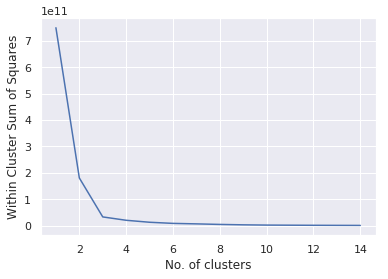

In [109]:
data_k = dataset_confirmed_cases_by_country[['Confirmed', 'Deaths', 'Recovered']]

from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    y_means = kmeans.fit(data_k)
    wcss.append(y_means.inertia_)

#Plotting WCSS to find the number of clusters
plt.plot(range(1,15), wcss)
plt.xlabel("No. of clusters")
plt.ylabel("Within Cluster Sum of Squares")
plt.show()

In [111]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 42)
y_kmeans = kmeans.fit_predict(data_k)


#beginning of  the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
# cluster = pd.DataFrame(y_kmeans1)
# Adding cluster to the Dataset1
data_k['cluster'] = list(y_kmeans1)
#Mean of clusters
kmeans_mean_cluster = pd.DataFrame(round(data_k.groupby('cluster').mean(),1))
kmeans_mean_cluster

Confirmed   Deaths  Recovered
cluster                               
1           1842.6     63.1      458.0
2         759774.0  40684.0    70522.0
3         169234.2  17110.8    62398.8
4          94361.0   7023.8    36642.0
5          36041.8   2526.8    10691.8

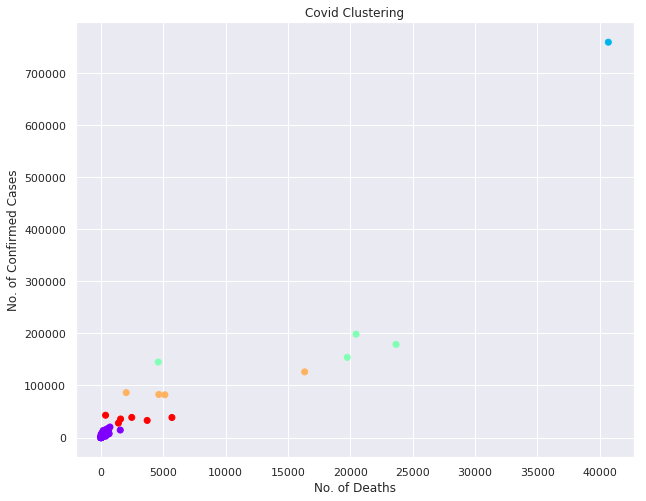

In [112]:
plt.figure(figsize=(10, 8))
plt.scatter(data_k.iloc[:,1], data_k.iloc[:,0],c=y_kmeans, cmap='rainbow')
plt.title('Covid Clustering')
plt.xlabel("No. of Deaths")
plt.ylabel("No. of Confirmed Cases")
plt.show()

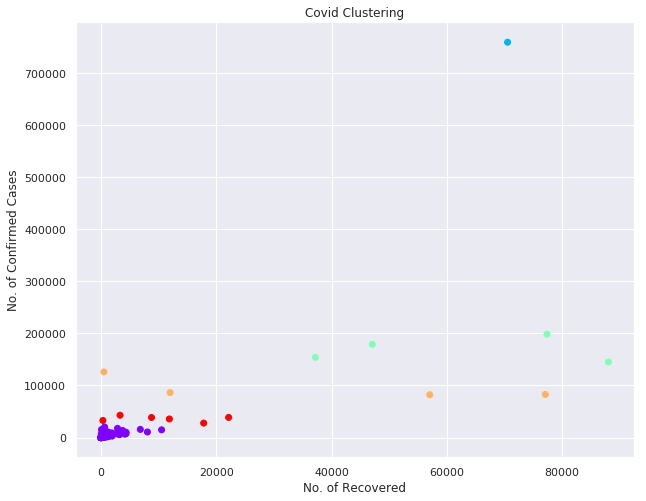

In [113]:
plt.figure(figsize=(10, 8))
plt.scatter(data_k.iloc[:,2], data_k.iloc[:,0],c=y_kmeans, cmap='rainbow')
plt.title('Covid Clustering')
plt.xlabel("No. of Recovered")
plt.ylabel("No. of Confirmed Cases")
plt.show()

In [129]:
dataset_confirmed_cases_by_country['cluster'] = list(y_kmeans1)
dataset_confirmed_cases_by_country[dataset_confirmed_cases_by_country['cluster'] == 3]

Country  Confirmed   Deaths  Recovered  cluster
69    France   154102.0  19744.0    37183.0        3
75   Germany   145189.0   4586.0    88000.0        3
100    Italy   178972.0  23660.0    47055.0        3
186    Spain   198674.0  20453.0    77357.0        3

Here I decided to try a clusterization. I used the k-means algorithm. I tried to cluster countries on 5 clusters. Here I used raw data, not divide on population. So, one of the clusters is the US (the biggest number of cases). Another cluster - France, Germany, Spain, Italy - Europe's countries with the biggest number of cases.

## Confirmed cases by state in the USA

In [31]:
usa_conf = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
df_conf_usa = pd.read_csv(usa_conf)
df_conf_usa

UID iso2 iso3  code3     FIPS  \
0           16.0   AS  ASM     16     60.0   
1          316.0   GU  GUM    316     66.0   
2          580.0   MP  MNP    580     69.0   
3          630.0   PR  PRI    630     72.0   
4          850.0   VI  VIR    850     78.0   
5     84001001.0   US  USA    840   1001.0   
6     84001003.0   US  USA    840   1003.0   
7     84001005.0   US  USA    840   1005.0   
8     84001007.0   US  USA    840   1007.0   
9     84001009.0   US  USA    840   1009.0   
10    84001011.0   US  USA    840   1011.0   
11    84001013.0   US  USA    840   1013.0   
12    84001015.0   US  USA    840   1015.0   
13    84001017.0   US  USA    840   1017.0   
14    84001019.0   US  USA    840   1019.0   
15    84001021.0   US  USA    840   1021.0   
16    84001023.0   US  USA    840   1023.0   
17    84001025.0   US  USA    840   1025.0   
18    84001027.0   US  USA    840   1027.0   
19    84001029.0   US  USA    840   1029.0   
20    84001031.0   US  USA    840   1031.0   
21    84001033.0   US  USA    840   1033.0   
22    84001035.0   US  USA    840   1035.0   
23    84001037.0   US  USA    840   1037.0   
24    84001039.0   US  USA    840   1039.0   
25    84001041.0   US  USA    840   1041.0   
26    84001043.0   US  USA    840   1043.0   
27    84001045.0   US  USA    840   1045.0   
28    84001047.0   US  USA    840   1047.0   
29    84001049.0   US  USA    840   1049.0   
...          ...  ...  ...    ...      ...   
3232  84090035.0   US  USA    840  90035.0   
3233  84090036.0   US  USA    840  90036.0   
3234  84090037.0   US  USA    840  90037.0   
3235  84090038.0   US  USA    840  90038.0   
3236  84090039.0   US  USA    840  90039.0   
3237  84090040.0   US  USA    840  90040.0   
3238  84090041.0   US  USA    840  90041.0   
3239  84090042.0   US  USA    840  90042.0   
3240  84090044.0   US  USA    840  90044.0   
3241  84090045.0   US  USA    840  90045.0   
3242  84090046.0   US  USA    840  90046.0   
3243  84090047.0   US  USA    840  90047.0   
3244  84090048.0   US  USA    840  90048.0   
3245  84090049.0   US  USA    840  90049.0   
3246  84090050.0   US  USA    840  90050.0   
3247  84090051.0   US  USA    840  90051.0   
3248  84090053.0   US  USA    840  90053.0   
3249  84090054.0   US  USA    840  90054.0   
3250  84090055.0   US  USA    840  90055.0   
3251  84090056.0   US  USA    840  90056.0   
3252  84099999.0   US  USA    840  99999.0   
3253  84070004.0   US  USA    840      NaN   
3254  84070005.0   US  USA    840      NaN   
3255  84070015.0   US  USA    840      NaN   
3256  84070016.0   US  USA    840      NaN   
3257  84070017.0   US  USA    840      NaN   
3258  84070018.0   US  USA    840      NaN   
3259  84070019.0   US  USA    840      NaN   
3260  84070020.0   US  USA    840      NaN   
3261         NaN   US  USA    840  90049.0   

                                         Admin2            Province_State  \
0                                           NaN            American Samoa   
1                                           NaN                      Guam   
2                                           NaN  Northern Mariana Islands   
3                                           NaN               Puerto Rico   
4                                           NaN            Virgin Islands   
5                                       Autauga                   Alabama   
6                                       Baldwin                   Alabama   
7                                       Barbour                   Alabama   
8                                          Bibb                   Alabama   
9                                        Blount                   Alabama   
10                                      Bullock                   Alabama   
11                                       Butler                   Alabama   
12                                      Calhoun                   Alabama   
13                                     Chambers                   Alabama   
14   

In [32]:
#only keep last date available
cols_to_keep = list(df_conf_usa.columns[6:10]) + list(df_conf_usa.columns[-1:])
df_conf_last = df_conf_usa[cols_to_keep]
df_conf_last.columns.values[-1] = "Confirmed"

df_conf_last.tail()

Province_State Country_Region        Lat       Long_  Confirmed
3257           Utah             US  38.996171 -110.701396         12
3258           Utah             US  37.854472 -111.441876         87
3259           Utah             US  40.124915 -109.517442         10
3260           Utah             US  41.271160 -111.914512        145
3261           Utah             US        NaN         NaN          0

In [131]:
#float required
df_conf_last['Confirmed'] = df_conf_last['Confirmed'].astype(float)
df_conf_last = df_conf_last.dropna()

map1 = folium.Map(location=[39,-98], zoom_start=4)

for i in range(0,len(df_conf_last)):
    folium.Circle(
      location=[df_conf_last.iloc[i]['Lat'], df_conf_last.iloc[i]['Long_']],
      tooltip = "Country: "+df_conf_last.iloc[i]['Country_Region']+"<br>Province_State: "+str(df_conf_last.iloc[i]['Province_State'])+"<br>Confirmed cases: "+str(df_conf_last.iloc[i]['Confirmed'].astype(int)),
      radius=df_conf_last.iloc[i]['Confirmed']*3,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map1)

map1

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [132]:
usa_death = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
df_death_usa = pd.read_csv(usa_death)
df_death_usa.head()

UID iso2 iso3  code3  FIPS Admin2            Province_State  \
0   16.0   AS  ASM     16  60.0    NaN            American Samoa   
1  316.0   GU  GUM    316  66.0    NaN                      Guam   
2  580.0   MP  MNP    580  69.0    NaN  Northern Mariana Islands   
3  630.0   PR  PRI    630  72.0    NaN               Puerto Rico   
4  850.0   VI  VIR    850  78.0    NaN            Virgin Islands   

  Country_Region      Lat     Long_  ... 4/17/20  4/18/20  4/19/20  4/20/20  \
0             US -14.2710 -170.1320  ...       0        0        0        0   
1             US  13.4443  144.7937  ...       5        5        5        5   
2             US  15.0979  145.6739  ...       2        2        2        2   
3             US  18.2208  -66.5901  ...      58       60       62       63   
4             US  18.3358  -64.8963  ...       2        3        3        3   

   4/21/20  4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  
0        0        0        0        0        0        0  
1        5        5        5        5        5        5  
2        2        2        2        2        2        2  
3       64       63       69       77       83       84  
4        3        3        3        3        3        4  

[5 rows x 108 columns]

In [135]:
#only keep last date available
cols_to_keep = list(df_death_usa.columns[6:10]) + list(df_death_usa.columns[-1:])
df_death_last = df_death_usa[cols_to_keep]
df_death_last.columns.values[-1] = "Death"
df_death_last = df_death_last.dropna()

#float required
df_death_last['Death'] = df_death_last['Death'].astype(float)

map2 = folium.Map(location=[39,-98], zoom_start=4)

for i in range(0,len(df_death_last)):
   folium.Circle(
      location=[df_death_last.iloc[i]['Lat'], df_death_last.iloc[i]['Long_']],
      tooltip = "Country: "+df_death_last.iloc[i]['Country_Region']+"<br>Province_State: "+str(df_death_last.iloc[i]['Province_State'])+"<br>Deaths: "+str(df_death_last.iloc[i]['Death'].astype(int)),
      radius=df_death_last.iloc[i]['Death']*10,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map2)

map2

In [136]:

body = client_8ebb3dab3d52442098e6ab3eec385363.get_object(Bucket='ibmcapstone-donotdelete-pr-69qaeapaalibwt',Key='us_county.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

usa_demografic = pd.read_csv(body)
usa_demografic = usa_demografic.rename(columns = {'fips': 'FIPS'})
usa_demografic.head()


FIPS          county    state state_code    male  female  median_age  \
0  1001  Autauga County  Alabama         AL   26874   28326        37.8   
1  1003  Baldwin County  Alabama         AL  101188  106919        42.8   
2  1005  Barbour County  Alabama         AL   13697   12085        39.9   
3  1007     Bibb County  Alabama         AL   12152   10375        39.9   
4  1009   Blount County  Alabama         AL   28434   29211        40.8   

   population  female_percentage        lat       long  
0       55200          51.315217  32.534923 -86.642730  
1      208107          51.376936  30.727479 -87.722564  
2       25782          46.873788  31.869581 -85.393210  
3       22527          46.055844  32.998628 -87.126475  
4       57645          50.673953  33.980869 -86.567380

In [139]:
df_conf = df_conf_usa.merge(usa_demografic[['FIPS', 'population']], on = ['FIPS'], how = "left")
df_death = df_death_usa.merge(usa_demografic[['FIPS', 'population']], on = ['FIPS'], how = "left")

cols = ['FIPS', 'Province_State', 'Lat', 'Long_', 'Country_Region', 'Combined_Key'] + list(df_conf.columns[-2:])
df_conf = df_conf[cols]
df_conf = df_conf.rename(columns = {'4/26/20': 'cases'})
df_conf['County'] = df_conf['Combined_Key'].apply(lambda x: x.split(', ')[0])

df_death = df_death[cols]
df_death = df_death.rename(columns = {'4/26/20': 'deaths'})
df_death['County'] = df_death['Combined_Key'].apply(lambda x: x.split(', ')[0])
df_death.head(10)

FIPS            Province_State        Lat       Long_ Country_Region  \
0    60.0            American Samoa -14.271000 -170.132000             US   
1    66.0                      Guam  13.444300  144.793700             US   
2    69.0  Northern Mariana Islands  15.097900  145.673900             US   
3    72.0               Puerto Rico  18.220800  -66.590100             US   
4    78.0            Virgin Islands  18.335800  -64.896300             US   
5  1001.0                   Alabama  32.539527  -86.644082             US   
6  1003.0                   Alabama  30.727750  -87.722071             US   
7  1005.0                   Alabama  31.868263  -85.387129             US   
8  1007.0                   Alabama  32.996421  -87.125115             US   
9  1009.0                   Alabama  33.982109  -86.567906             US   

                   Combined_Key  deaths  population                    County  
0            American Samoa, US       0         NaN            American Samoa  
1                      Guam, US       5         NaN                      Guam  
2  Northern Mariana Islands, US       2         NaN  Northern Mariana Islands  
3               Puerto Rico, US      84         NaN               Puerto Rico  
4            Virgin Islands, US       4         NaN            Virgin Islands  
5          Autauga, Alabama, US       2     55200.0                   Autauga  
6          Baldwin, Alabama, US       3    208107.0                   Baldwin  
7          Barbour, Alabama, US       0     25782.0                   Barbour  
8             Bibb, Alabama, US       0     22527.0                      Bibb  
9           Blount, Alabama, US       0     57645.0                    Blount

In [140]:
us_covid = df_conf.merge(df_death[['FIPS', 'deaths']], on = ['FIPS'], how = "inner")
us_covid.head()

FIPS            Province_State      Lat     Long_ Country_Region  \
0  60.0            American Samoa -14.2710 -170.1320             US   
1  66.0                      Guam  13.4443  144.7937             US   
2  69.0  Northern Mariana Islands  15.0979  145.6739             US   
3  72.0               Puerto Rico  18.2208  -66.5901             US   
4  78.0            Virgin Islands  18.3358  -64.8963             US   

                   Combined_Key  cases  population                    County  \
0            American Samoa, US      0         NaN            American Samoa   
1                      Guam, US    141         NaN                      Guam   
2  Northern Mariana Islands, US     14         NaN  Northern Mariana Islands   
3               Puerto Rico, US   1371         NaN               Puerto Rico   
4            Virgin Islands, US     57         NaN            Virgin Islands   

   deaths  
0       0  
1       5  
2       2  
3      84  
4       4

In [141]:
us_cum = us_covid.copy()

#rounding population to millions with 2 digits, and creating two new columns
us_cum['population'] = round((us_cum['population']/1000),2)
us_cum = us_cum.rename(columns = {'population': 'Population (thousand)'})
us_cum['Cases per Thousand'] = round((us_cum['cases']/us_cum['Population (thousand)']),2)
us_cum['Deaths per Thousand'] = round((us_cum['deaths']/us_cum['Population (thousand)']),2)

#remove states with missing population
us_cum = us_cum[(us_cum['Population (thousand)'] != 0)]
cols_to_save = list(['Province_State', 'County', 'Population (thousand)', 'cases', 'Cases per Thousand', 'deaths', 'Deaths per Thousand'])
us_cum = us_cum[cols_to_save]

In [142]:
us_cum = us_cum.sort_values(by = "Deaths per Thousand", ascending = False).reset_index(drop=True)
us_cum.head(10).style.background_gradient(cmap='Reds')

In [143]:
new_york = us_cum[(us_cum.Province_State == "New York")]
new_york.head(10).style.background_gradient(cmap='Reds')

If we analyze data for the US, obviously the first place by confirmed cases and deaths takes New York. Also a lot of cases in Georgia state.

## Results and Discussion <a name="results"></a>

In this project, I analyzed data connected with the spreading of COVID-19 in the world. Such countries like China, South Korea, Australia are now on a stage of a plateau (how we know is the main goal of each country because when a country is on a plateau the hospitals are not overcrowded and the number of doctors per patients is enough). If China has a lot number of deaths, Korea has less. So, necessary precautions were taken in time could help to keep the spreading of the virus. We saw dynamics and if we recalculate it with new data we will able to make an assumption on how far a country is from a stage of a plateau. 

Despite a big number of cases in the USA the situation in Europe is worse if look at data through a number of population. In the USA how we know from the news and how analysis shows the worse situation is in New York state and New York City inside state.

Also, clusterization was made. Countries were grouped on 5 clusters and we can see dependencies inside clusters (for example, there is a cluster for the US, cluster for Europ's countries with a lot number of cases).

What could be improved? Make a clusterization on weighted data by population. Also, I think, it will be great to find some data about the number of tests in each country, because if not enough tests were made the situation isn't real. Additional information could be a number of hospitals, doctors, some rating of health on the nation.


## Be Healthy and Stay at Home!
![](https://www.bocaratontribune.com/wp-content/uploads/2020/03/Stay-Home-Save-Lives-png-e1584449162960.png)